In [10]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 9

In [8]:
from libnn.losses import CategoricalCrossEntropy
from libnn.modules.activations import Softmax, Tanh, ReLU
from libnn.modules.layers import Linear

In [9]:
X = np.random.randn(1000, 500)

In [19]:
def get_activations(X, initialization='random_normal', n_layers=10, activation=Tanh, hidden_size=500):
    activations = []
    
    for i in range(n_layers):
        linear = Linear(X.shape[1], hidden_size, init=initialization)
        act = activation()  
        X = act(linear(X))
        
        activations.append(X)
    
    return activations

In [39]:
def plot_activations(activations, n_cols=3, bins=20):
    n_rows = int(np.ceil(len(activations) / 3))

    fig, ax = plt.subplots(n_rows, n_cols, sharex=True)

    for i in range(len(activations)):
        sns.distplot(activations[i].ravel(), bins=bins, ax=ax[int(np.floor(i / n_cols))][i % n_cols])

Now that we have defined the functions to perform the forward pass and plot the activations, we can take a look at the activations.

The standard random normal weight initialization has problems. We can see that only the first 2 or so layers are distributed normally. This also doesn't train at all, due to the vanishining gradient problem.

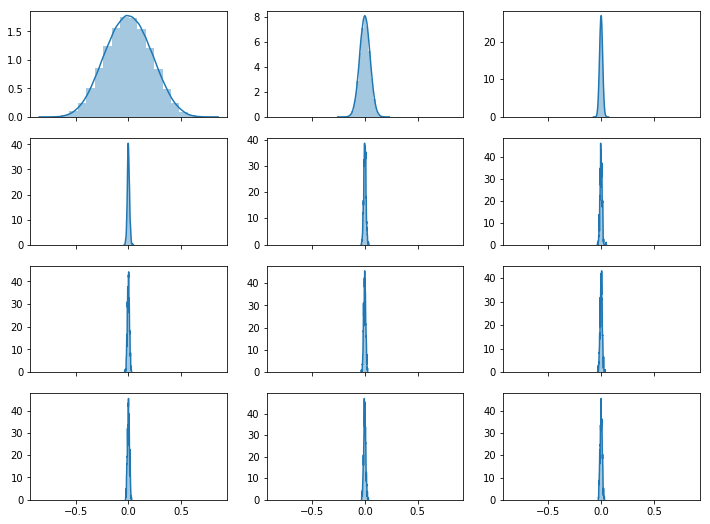

In [43]:
plot_activations(get_activations(X, initialization='random_normal', activation=Tanh, n_layers=12))

Using the xavier initialization scheme, we can see that the activations have nice distributions all the way to the last layer.

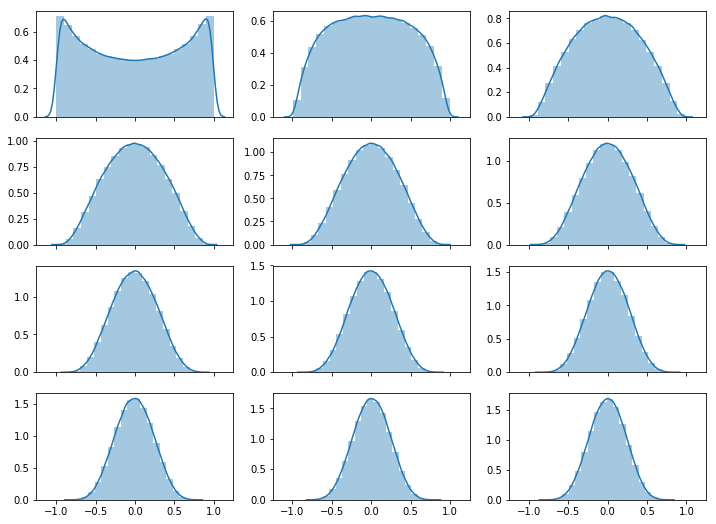

In [44]:
plot_activations(get_activations(X, initialization='xavier', activation=Tanh, n_layers=12))

The previous tests were done using the tanh activation, what happens when using ReLUs.

We can see that all the activations get bunched around 0, which is bad, because no training will occur. Let's try the xavier initialization scheme.

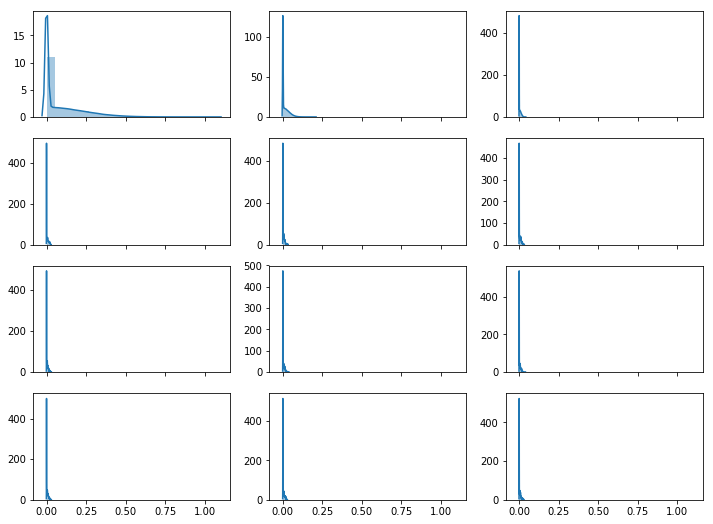

In [45]:
plot_activations(get_activations(X, initialization='random_normal', activation=ReLU, n_layers=12))

The standard xavier initialization scheme also doesn't seem to work well here, because we didn't account for the fact that relu activations kill half the gradients. We can fix this by adding a division by 2 term.

Note that this does do better than the random normal initialization, but we don't see the nice effect we saw with tanh.

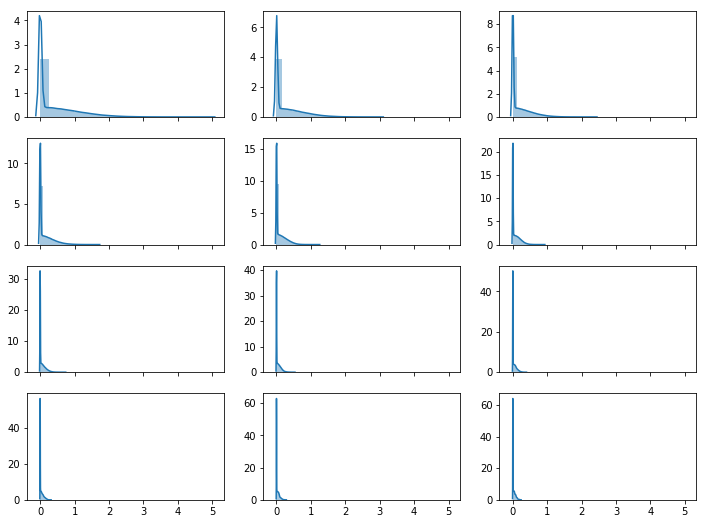

In [46]:
plot_activations(get_activations(X, initialization='xavier', activation=ReLU, n_layers=12))

Using the corrected xavier initialization scheme, we get the desired effect.

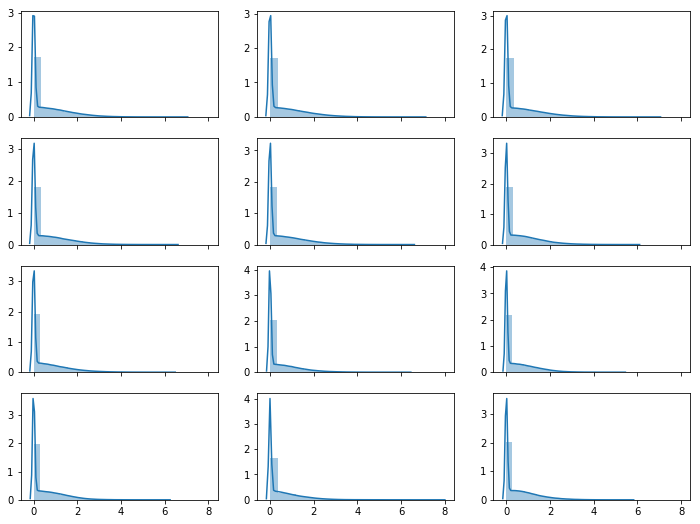

In [47]:
plot_activations(get_activations(X, initialization='xavier_relu', activation=ReLU, n_layers=12))